In [16]:
import pandas as pd
from sklearn import preprocessing 

df = pd.read_csv("segmented_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0
2,3,Female,20.0,16.0,6.0,4.0
3,4,Female,23.0,16.0,77.0,3.0
4,5,Female,31.0,17.0,40.0,4.0


In [17]:
# пропуски в датасете
print('Пропуски: ', df[df.isna().any(axis=1)])
print('Дубликаты: ', df[df.duplicated(subset=['CustomerID'])])


Пропуски:       CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
200         201  Female  21.0                 NaN                    40.0   
201         202  Female  30.0               127.0                     NaN   
202         203    Male  80.0                 NaN                    20.0   
203         204    Male   NaN                16.0                   120.0   
204         205  Female   NaN                 9.0                    80.0   

     cluster  
200      0.0  
201      NaN  
202      NaN  
203      NaN  
204      NaN  
Дубликаты:  Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), cluster]
Index: []


In [18]:
# Удаляем пропуски, так как их немного
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 
                     'Gender' : 'gender', 
                    'Age': 'age', 
                    'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', 
                    }, inplace = True)

In [19]:
# Визуализацию будем проводить по трём признакам: 
# годовой заработок, коэффициент покупательской способности и возраст.
import plotly
import plotly.express as px


def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )
    return fig


In [20]:
# Признаки для модели
X = df[['age', 'annual_income', 'spending_score']]

### DBSCAN-кластеризация

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN().fit(X)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_sample'] = clustering_dbscan_res
print('Всего кластеров: ', len(set(dbscan.labels_)))

get_3d_visualization(df, 'dbscan_sample')

Всего кластеров:  1


In [29]:
# Изменим параметры алгортма:
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=11)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(df, 'dbscan_res_eps_11')

Распределение данных неоднородно: в одной области они имеют высокую плотность, в другой области — разряжены. Такие данные не подходят для успешной кластеризации алгоритмом DBSCAN.

### Агломеративная кластеризация

In [30]:
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
def get_aggl_clustering(X, n_clusters):
    
    agglomerative_clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage='ward')
    # обучение
    agglomerative_clustering.fit(X)
    # список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    
    return aggl_prediction


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

Визуализируем дендрограмму

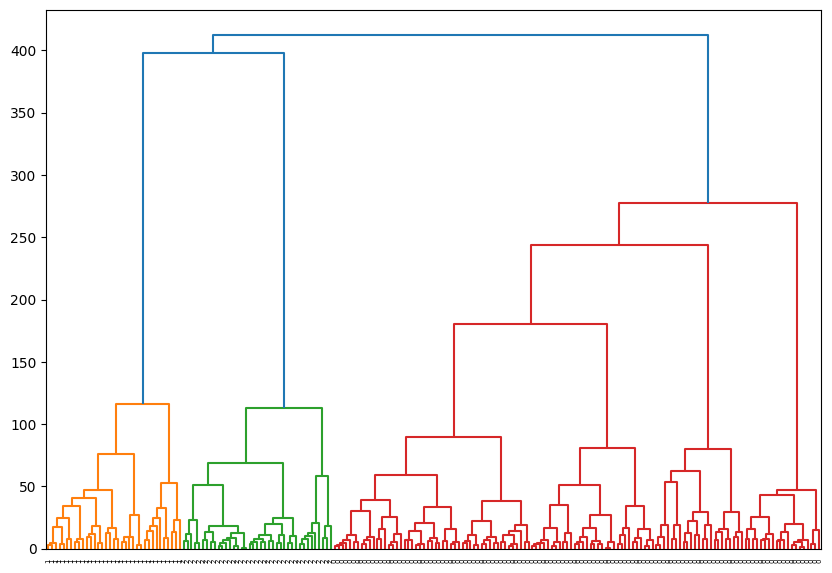

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию и сохраним результаты в df
df['aggl_res_3'] = get_aggl_clustering(X, 3)

linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=df['aggl_res_3'].to_list(),
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

Проводим линию на 150, потому что высота деревьев резко вырастает.  
Получаем шесть кластеров.

In [33]:
df['aggl_res_6'] = get_aggl_clustering(X, 6)
get_3d_visualization(df, 'aggl_res_6')

Вычислим количество кластеров с помощью коэффициента силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

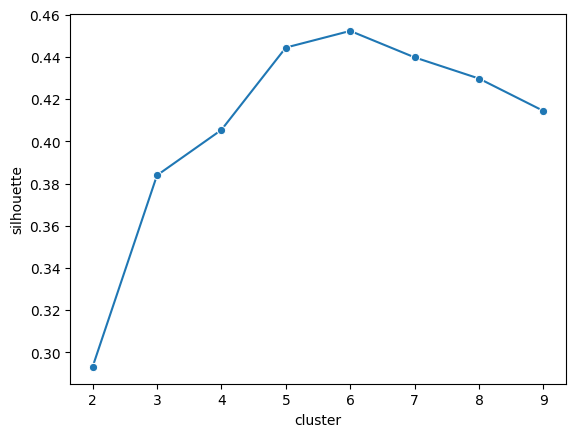

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
import seaborn as sns

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)

# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Считаем Метрику полноты

In [39]:
from sklearn.metrics.cluster import completeness_score

print(round(completeness_score(labels_true=df.cluster, labels_pred=df.aggl_res_6), 2))

0.9
